# Programming assignment 1: Visualizing COVID-19 data

## Disclaimer!!

##### - This is not an epidemiology study. It is simply a visualization exercise. Some epidemiology terms may not be correct. related to this [tweet.](https://twitter.com/tobiasgalla/status/1245612214632902656)
##### - ”Not enough testing was done in my country” is a true statement for every country/province/county/city. This is the data we have to work and infer some understanding of what’s happening. Data is always incomplete and inaccurate.
##### - Please use only the raw data I share. This makes marking consistent for the TAs. You can use more recent data to further customize your own dashboard outside this assignment.

# Geographic distribution of worldwide COVID-19 data

# 5. Task #2: Plot the profile rates per 1M residents

Since the countries populations vary a lot, counting the absolute cases and deaths is not a
fair metric. Normalizing the cases and deaths per 1 million residents is a typical procedure
to get an unbiased view of the data. To do do, simply use the logic below:

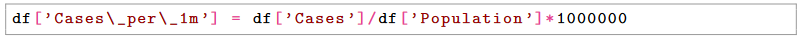

##### Use the same logic we used in Section #3 (steps 12-13) to plot the 2×2 subplots with:

##### a) cumulative infection rate per 1M
##### b) cumulative mortality rate per 1M

##### Here, notice that the cumulative rate profiles are smooth and you don’t need to calculate the moving average. Also, in both cases, make sure that you sort by each rate per 1M so that the top 5 countries appear in the [0, 0] subplot (top left), the 6-10 appear in the [0, 1] subplot (top right), and so on.

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from scipy import stats
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter

import warnings
warnings.filterwarnings('ignore')

In [2]:
cumalative_covid = pd.read_excel('Covid_A_Master_Cumalative_Table.xlsx')
cumalative_covid.drop(columns = ['Unnamed: 0'], inplace = True)
cumalative_covid

,Cases,Deaths,Date,Country,Population,Continent
0,0,0,2019-12-31,Afghanistan,38041757.0,Asia
1,0,0,2019-12-31,Algeria,43053054.0,Africa
2,0,0,2019-12-31,Armenia,2957728.0,Europe
3,0,0,2019-12-31,Australia,25203200.0,Oceania
4,0,0,2019-12-31,Austria,8858775.0,Europe
...,...,...,...,...,...,...
38906,1034,30,2020-08-27,Vietnam,96462108.0,Asia
38907,766,1,2020-08-27,Western_Sahara,582458.0,Africa
38908,1930,560,2020-08-27,Yemen,29161922.0,Asia
38909,11376,282,2020-08-27,Zambia,17861034.0,Africa


In [3]:
last_day_per_year = cumalative_covid.groupby(by = ['Country'])['Date'].max()
last_day_per_year = last_day_per_year.to_frame()
last_day_per_year.reset_index()

,Country,Date
0,Afghanistan,2020-08-27
1,Albania,2020-08-27
2,Algeria,2020-08-27
3,Andorra,2020-08-27
4,Angola,2020-08-27
...,...,...
205,Vietnam,2020-08-27
206,Western_Sahara,2020-08-27
207,Yemen,2020-08-27
208,Zambia,2020-08-27


In [4]:
last_day = pd.merge(cumalative_covid, last_day_per_year, how = 'inner', 
                    left_on = ['Country', 'Date'], right_on = ['Country', 'Date'])
last_day = last_day.sort_values(by = 'Deaths', ascending = False)
last_day = last_day.reset_index()

In [5]:
N = 20
top_countries = last_day[:N]['Country'].to_list()
# top_countries

In [6]:
K = 10
top_countries_deaths = cumalative_covid[cumalative_covid.Country.isin(top_countries)]
top_countries_deaths = top_countries_deaths[top_countries_deaths['Deaths'] > K]
# top_countries_deaths

In [7]:
day_0_for_every_country = top_countries_deaths.groupby(by = ['Country']).min()
day_0_for_every_country = day_0_for_every_country['Date']
day_0_for_every_country.to_frame()

,Date
Country,
Argentina,2020-03-27
Belgium,2020-03-15
Brazil,2020-03-21
Canada,2020-03-21
Chile,2020-04-01
Colombia,2020-03-31
France,2020-03-09
Germany,2020-03-16
India,2020-03-26


In [8]:
top_countries_deaths = top_countries_deaths.merge(day_0_for_every_country, how = 'inner', on = 'Country')
top_countries_deaths = top_countries_deaths.rename(columns = {'Date_y': 'Date_0'})
top_countries_deaths['Days from 0'] = (top_countries_deaths['Date_x'] - top_countries_deaths['Date_0']).dt.days
top_countries_deaths['Case fatality rate'] = (top_countries_deaths['Deaths'] / top_countries_deaths['Cases']) * 100
top_countries_deaths['Infection rate per million'] = (top_countries_deaths['Cases'] / top_countries_deaths['Population']) * 1000000
top_countries_deaths['Mortality rate per million'] = (top_countries_deaths['Deaths'] / top_countries_deaths['Population']) * 1000000
top_countries_deaths = top_countries_deaths.sort_values('Mortality rate per million', ascending = False)

top_countries_deaths

,Cases,Deaths,Date_x,Country,Population,Continent,Date_0,Days from 0,Case fatality rate,Infection rate per million,Mortality rate per million
2642,613378,28124,2020-08-27,Peru,3.251046e+07,America,2020-03-28,152,4.585101,18867.095768,865.075372
1052,82936,9879,2020-08-27,Belgium,1.145552e+07,Europe,2020-03-15,165,11.911594,7239.829116,862.379086
1051,82936,9878,2020-08-26,Belgium,1.145552e+07,Europe,2020-03-15,164,11.910389,7239.829116,862.291791
1050,82777,9874,2020-08-25,Belgium,1.145552e+07,Europe,2020-03-15,163,11.928434,7225.949344,861.942615
1049,82273,9869,2020-08-24,Belgium,1.145552e+07,Europe,2020-03-15,162,11.995430,7181.953083,861.506144
...,...,...,...,...,...,...,...,...,...,...,...
2032,1071,29,2020-03-30,India,1.366418e+09,Asia,2020-03-26,4,2.707750,0.783801,0.021223
2031,979,25,2020-03-29,India,1.366418e+09,Asia,2020-03-26,3,2.553626,0.716472,0.018296
2030,873,19,2020-03-28,India,1.366418e+09,Asia,2020-03-26,2,2.176403,0.638897,0.013905
2029,724,17,2020-03-27,India,1.366418e+09,Asia,2020-03-26,1,2.348066,0.529853,0.012441


In [9]:
max_cases = top_countries_deaths.groupby(by = 'Country').max()
max_cases = max_cases.sort_values('Mortality rate per million', ascending = False)
max_cases

,Cases,Deaths,Date_x,Population,Continent,Date_0,Days from 0,Case fatality rate,Infection rate per million,Mortality rate per million
Country,,,,,,,,,,
Peru,613378,28124,2020-08-27,3.251046e+07,America,2020-03-28,152,5.048859,18867.095768,865.075372
Belgium,82936,9879,2020-08-27,1.145552e+07,Europe,2020-03-15,165,15.979353,7239.829116,862.379086
UK,328846,41465,2020-08-27,6.664711e+07,Europe,2020-03-15,165,15.699629,4934.137281,622.157491
Spain,419849,28971,2020-08-26,4.693706e+07,Europe,2020-03-10,169,12.194832,8944.936048,617.230819
Italy,262540,35458,2020-08-27,6.035955e+07,Europe,2020-02-26,183,14.525233,4349.601967,587.446433
Chile,402365,10990,2020-08-27,1.895204e+07,America,2020-04-01,148,2.732771,21230.701611,579.884957
Brazil,3717156,117665,2020-08-27,2.110495e+08,America,2020-03-21,159,6.993168,17612.719601,557.523185
USA,5821876,179714,2020-08-27,3.290649e+08,America,2020-03-05,175,6.918239,17692.180780,546.135400
Mexico,573888,62076,2020-08-27,1.275755e+08,America,2020-03-28,152,12.396970,4498.417561,486.582344


## A) Cumulative Mortality Rate per 1M

In [10]:
# back_calc IS THE BACK WINDOW THAT IS USED TO CALCULATE THE SLOPE
back_calc = 2
slope_df = pd.DataFrame(columns=['Country', 'Days from 0', 'Slope', 'R2', 'P_value'])

for country in top_countries:
    one_country_data = top_countries_deaths[top_countries_deaths['Country'] == str(country)].reset_index(drop=True)
#     one_country_data['log_cases'] = np.log10(one_country_data['Cases'])
    for i in np.arange(back_calc, len(one_country_data)+1):
        x = one_country_data.loc[i-back_calc: i, 'Days from 0'] # That is the 'Days_from_0'
        y = one_country_data.loc[i-back_calc: i, 'Mortality rate per million'] # 
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        one_country_data.loc[i-1, 'Slope'] = slope
        one_country_data.loc[i-1, 'R2'] = r_value * r_value
        one_country_data.loc[i-1, 'P_value'] = p_value
        one_country = one_country_data[['Country', 'Days from 0', 'Slope', 'R2', 'P_value']]
    
    slope_df = slope_df.append(one_country, ignore_index=False)
    
slope_df.set_index('Country', drop = False, inplace = True)
slope_df

,Country,Days from 0,Slope,R2,P_value
Country,,,,,
USA,USA,175,NaN,NaN,NaN
USA,USA,174,3.699878,0.999975,0.00317
USA,USA,173,2.552688,0.940178,0.157304
USA,USA,172,1.393342,0.999667,0.011623
USA,USA,171,2.12724,0.95732,0.132473
...,...,...,...,...,...
Iraq,Iraq,4,0.076317,1.0,0.0
Iraq,Iraq,3,0.039976,0.909774,0.194224
Iraq,Iraq,1,0.025439,0.75,0.333333


In [11]:
slope_df.index.name = None
max_slope = slope_df.groupby(by=['Country']).max()
max_slope = max_slope.sort_values('Slope', ascending=False)
max_slope['Country'] = max_slope.index
# max_slope.index.name = None

max_slope

,Days from 0,Slope,R2,P_value,Country
Country,,,,,
Peru,152,63.779469,1.0,0.333333,Peru
Chile,148,30.629956,1.0,0.326063,Chile
Belgium,165,26.100956,1.0,0.333333,Belgium
France,171,22.809047,1.0,1.000000,France
Spain,169,20.048124,1.0,1.000000,Spain
UK,165,16.789925,1.0,0.333333,UK
Italy,183,15.391103,1.0,0.835556,Italy
USA,175,11.146737,1.0,0.333333,USA
Argentina,153,7.983354,1.0,0.333333,Argentina


In [12]:
data_1_5 = slope_df[slope_df.Country.isin(max_slope[:5]['Country'].tolist())]
data_1_5.reset_index(inplace = True)
data_1_5 = data_1_5.drop(columns = 'index')
Country_1_5 = max_slope[:5]['Country'].tolist()

data_6_10 = slope_df[slope_df.Country.isin(max_slope[5:10]['Country'].tolist())]
data_6_10.reset_index(inplace = True)
data_6_10 = data_6_10.drop(columns = 'index')
Country_6_10 = max_slope[5:10]['Country'].tolist()

data_11_15 = slope_df[slope_df.Country.isin(max_slope[10:15]['Country'].tolist())]
data_11_15.reset_index(inplace = True)
data_11_15 = data_11_15.drop(columns = 'index')
Country_11_15 = max_slope[10:15]['Country'].tolist()

data_16_20 = slope_df[slope_df.Country.isin(max_slope[15:20]['Country'].tolist())]
data_16_20.reset_index(inplace = True)
data_16_20 = data_16_20.drop(columns = 'index')
Country_16_20 = max_slope[15:20]['Country'].tolist()

# data_1_5
# Country_1_5

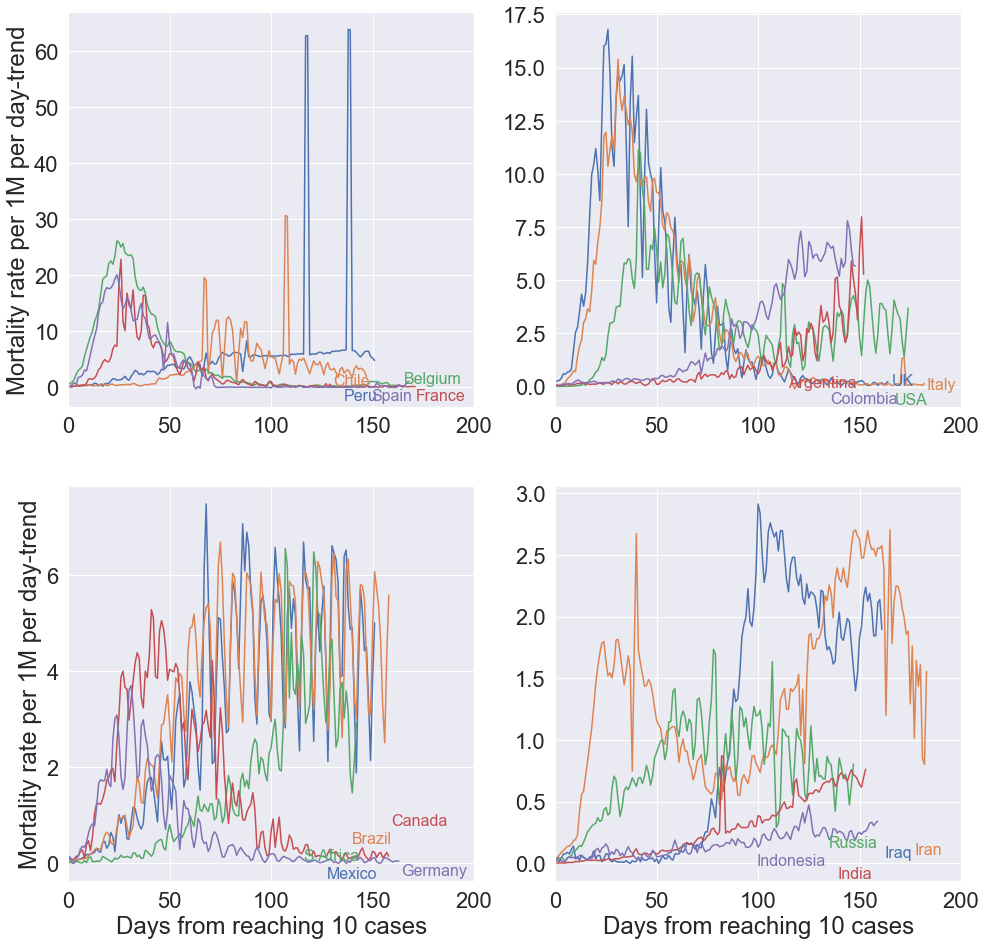

In [13]:
sns.set(rc={'figure.figsize':(16,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_1_5, markers=True, hue_order=Country_1_5, legend=False, ax=axes[0, 0])
texts = [axes[0, 0].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 0].get_lines()[Country_1_5.index(country)].get_c(), ha = 'left', va = 'center') for country in Country_1_5]
adjust_text(texts)
axes[0, 0].set_ylabel("Mortality rate per 1M per day-trend",fontsize=24)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_6_10, markers=True, hue_order=Country_6_10, legend=False, ax=axes[0, 1])
texts = [axes[0, 1].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 1].get_lines()[Country_6_10.index(country)].get_c(), ha = 'left', va = 'top') for country in Country_6_10]
adjust_text(texts)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_11_15, markers=True, hue_order=Country_11_15, legend=False, ax=axes[1, 0])
texts = [axes[1, 0].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 0].get_lines()[Country_11_15.index(country)].get_c(), ha = 'left', va = 'center') for country in Country_11_15]
adjust_text(texts)
axes[1, 0].set_ylabel("Mortality rate per 1M per day-trend",fontsize=24)
axes[1, 0].set_xlabel("Days from reaching {:.0f} cases".format(K),fontsize=24)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_16_20, markers=True, hue_order=Country_16_20, legend=False, ax=axes[1, 1])
texts = [axes[1, 1].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 1].get_lines()[Country_16_20.index(country)].get_c(), ha = 'left', va = 'center') for country in Country_16_20]
adjust_text(texts)
axes[1, 1].set_xlabel("Days from reaching {:.0f} cases".format(K),fontsize=24)

axes[0, 1].set_ylabel("",fontsize=24)
axes[1, 1].set_ylabel("",fontsize=24)
axes[0, 0].set_xlabel("",fontsize=24)
axes[0, 1].set_xlabel("",fontsize=24)
axes[0, 1].set_xlim([0, 200])
axes[1, 1].set_xlim([0, 200])
axes[0, 0].set_xlim([0, 200])
axes[1, 0].set_xlim([0, 200])
# axes[0, 0].set_yscale('log')
# axes[0, 1].set_yscale('log')
# axes[1, 0].set_yscale('log')
# axes[1, 1].set_yscale('log')

plt.savefig('Task_2_Fig_2.2_Patel_Abhishek.png')